### Goal : 

Plot a timeseries taken from http://openweathermap.org/forecast5

Step 1 : request the url   
Step 2 : save the response in json format  
Step 3 : create a dataframe with the data with pd.DataFrame.from_dict  
Step 4 : plot  


In [2]:
import os
os.environ['NO_PROXY'] = 'samples.openweathermap.org'

In [3]:
# To get data from the internet
import requests
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = "http://samples.openweathermap.org/data/2.5/forecast?q=London,us&appid=b1b15e88fa797225412429c1c50c122a1"

In [11]:
data = requests.get(url).json()

In [16]:
interesting_points = []

for element in data["list"]:
    new_point = {}
    new_point["temp_min"] = element['main']['temp_min']
    new_point["temp_max"] = element['main']['temp_max']
    new_point["date"] = element['dt_txt']
    interesting_points.append(new_point)


In [17]:
df = pd.DataFrame.from_dict(interesting_points)

In [18]:
df['date'] =  pd.to_datetime(df['date'])

In [19]:
df['temp_max'] = df['temp_max'] - 273
df['temp_min'] = df['temp_min'] - 273

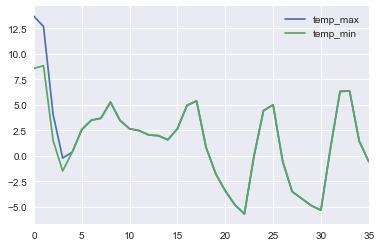

In [20]:
df.plot()